# Sector Mappings

To generate sector allocation plots in the positions tearsheet and PnL by sector in the round trips tearsheet, you must pass pyfolio a dictionary (or dict-like data struction) of symbol-sector mappings, where symbols are keys and sectors are values. `create_full_tearsheet` will also take symbol-sector mappings as keyword argument `sector_mappings`.

In [1]:
%matplotlib inline
import pyfolio as pf
import gzip
import os
import pandas as pd

In [5]:
transactions = pd.read_csv(gzip.open('tests/test_data/test_txn.csv.gz'),
                    index_col=0, parse_dates=0)
positions = pd.read_csv(gzip.open('tests/test_data/test_pos.csv.gz'),
                    index_col=0, parse_dates=0)
returns = pd.read_csv(gzip.open('tests/test_data/test_returns.csv.gz'),
                    index_col=0, parse_dates=0, header=None)[1]
gross_lev = pd.read_csv(gzip.open('tests/test_data/test_gross_lev.csv.gz'),
                    index_col=0, parse_dates=0, header=None)[1]

In [6]:
returns.index = returns.index.tz_localize("UTC")
positions.index = positions.index.tz_localize("UTC")
transactions.index = transactions.index.tz_localize("UTC")
gross_lev.index = gross_lev.index.tz_localize("UTC")


In [7]:
positions.head(2)

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2004-01-09 00:00:00+00:00,6961.92,21017.07875,7282.266152,21264.55188,7091.080020,21259.33389,21316.129606,-6192.360298
2004-01-12 00:00:00+00:00,18198.58,18071.25000,17675.836401,10804.31924,10685.411865,17872.47748,10882.026400,-3329.289887


In [8]:
sect_map = {'COST': 'Consumer Goods', 
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}

Top 10 long positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


Top 10 short positions of all time,max
AMD,-30.12%
DELL,-26.58%
CERN,-25.51%
MMM,-22.62%
GPS,-20.09%
INTC,-18.47%
COST,-16.44%


Top 10 positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


All positions ever held,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


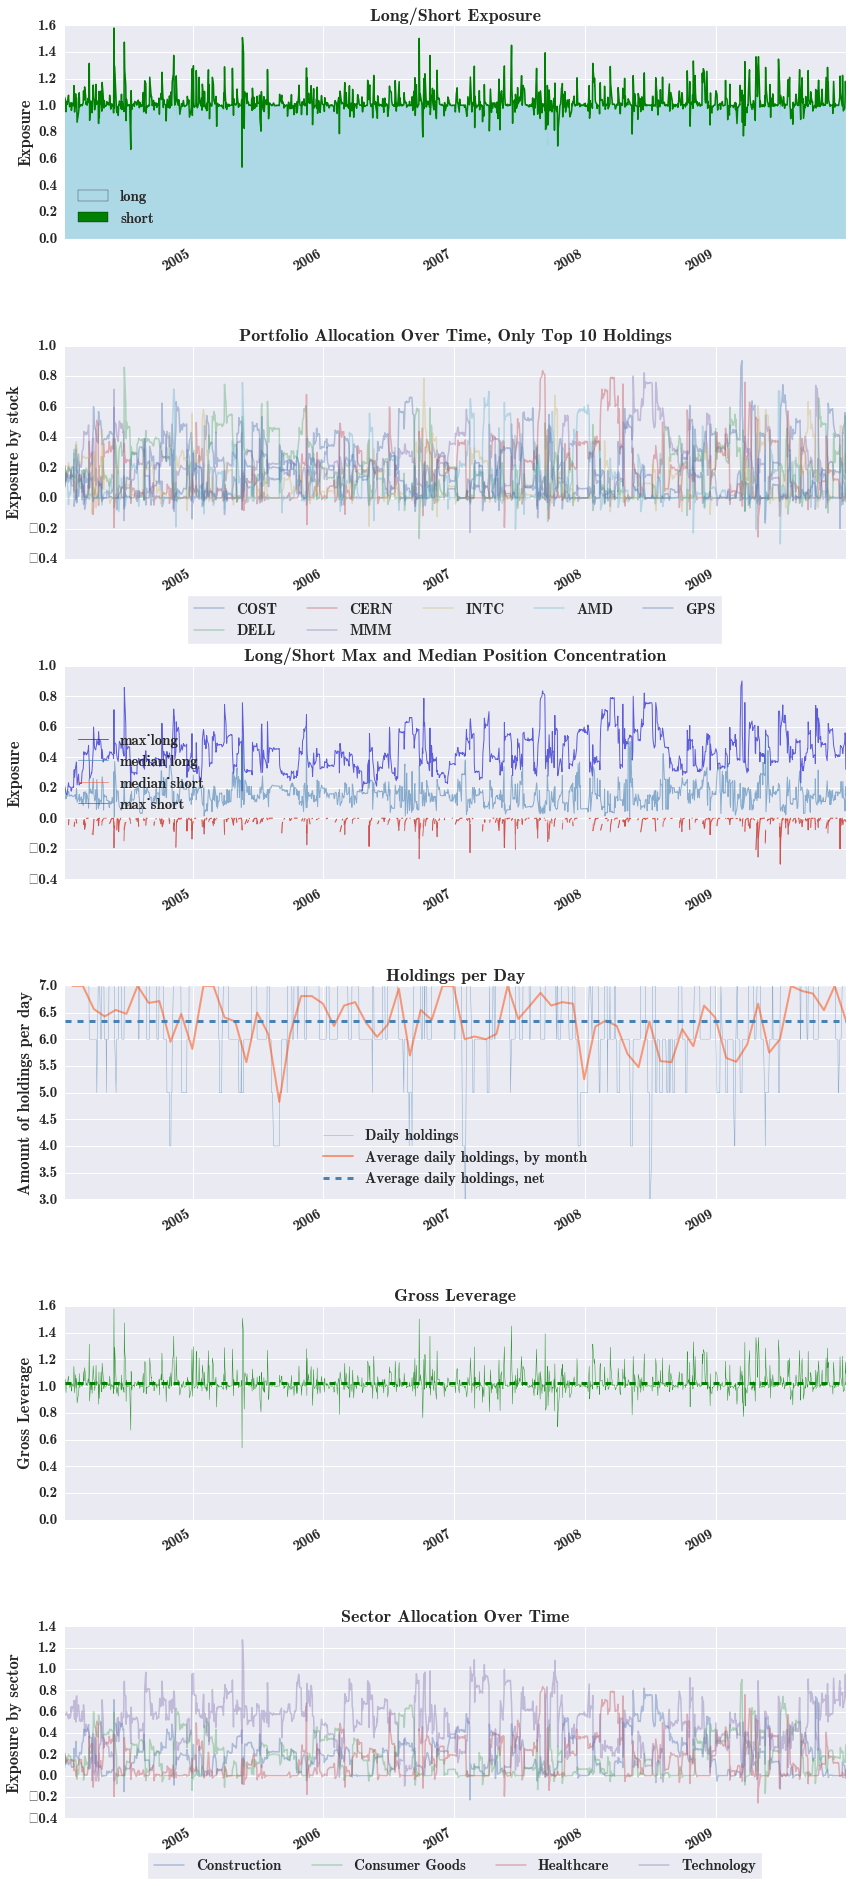

In [9]:
pf.create_position_tear_sheet(returns, positions, gross_lev=gross_lev, sector_mappings=sect_map)


Summary stats,All trades,Short trades,Long trades
Total number of round_trips,5822.00,1155.00,4667.00
Percent profitable,0.50,0.52,0.49
Winning round_trips,2887.00,596.00,2291.00
Losing round_trips,2917.00,553.00,2364.00
Even round_trips,18.00,6.00,12.00


PnL stats,All trades,Short trades,Long trades
Total profit,$65404.25,$3560.10,$61844.15
Gross profit,$448803.34,$20608.45,$428194.89
Gross loss,$-383399.09,$-17048.35,$-366350.75
Profit factor,$1.17,$1.21,$1.17
Avg. trade net profit,$11.23,$3.08,$13.25
Avg. winning trade,$155.46,$34.58,$186.90
Avg. losing trade,$-131.44,$-30.83,$-154.97
Ratio Avg. Win:Avg. Loss,$1.18,$1.12,$1.21
Largest winning trade,$9500.14,$1623.24,$9500.14
Largest losing trade,$-22902.83,$-661.29,$-22902.83


Duration stats,All trades,Short trades,Long trades
Avg duration,13 days 03:21:49.653555,2 days 10:39:35.064935,15 days 18:53:36.628026
Median duration,8 days 00:00:00,2 days 00:00:00,12 days 00:00:00
Avg # round_trips per day,70.14,96.25,56.23
Avg # round_trips per month,1473.04,2021.25,1180.81


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.01%,0.00%,0.01%
Avg returns winning,0.13%,0.03%,0.15%
Avg returns losing,-0.11%,-0.03%,-0.13%
Median returns all round_trips,-0.00%,0.00%,-0.00%
Median returns winning,0.02%,0.01%,0.03%
Median returns losing,-0.01%,-0.00%,-0.02%
Largest winning trade,6.78%,1.37%,6.78%
Largest losing trade,-17.23%,-0.72%,-17.23%


Symbol stats,AMD,CERN,COST,DELL,GPS,INTC,MMM
Avg returns all round_trips,-0.00%,0.02%,0.02%,-0.03%,0.00%,0.02%,0.01%
Avg returns winning,0.20%,0.15%,0.10%,0.11%,0.10%,0.11%,0.10%
Avg returns losing,-0.19%,-0.13%,-0.07%,-0.15%,-0.09%,-0.06%,-0.09%
Median returns all round_trips,-0.00%,0.00%,0.00%,-0.00%,-0.00%,-0.00%,0.00%
Median returns winning,0.03%,0.02%,0.02%,0.02%,0.02%,0.01%,0.02%
Median returns losing,-0.02%,-0.01%,-0.01%,-0.02%,-0.01%,-0.01%,-0.01%
Largest winning trade,6.78%,6.14%,3.96%,2.78%,1.80%,2.40%,2.45%
Largest losing trade,-17.23%,-3.92%,-2.32%,-6.39%,-6.86%,-4.45%,-1.79%


Profitability (PnL / PnL total) per name,pnl
symbol,
COST,0.40%
INTC,0.38%
CERN,0.32%
MMM,0.22%
GPS,0.05%
AMD,-0.06%
DELL,-0.31%


Profitability (PnL / PnL total) per name,pnl
symbol,
Consumer Goods,0.40%
Healthcare,0.32%
Construction,0.22%
Technology,0.06%


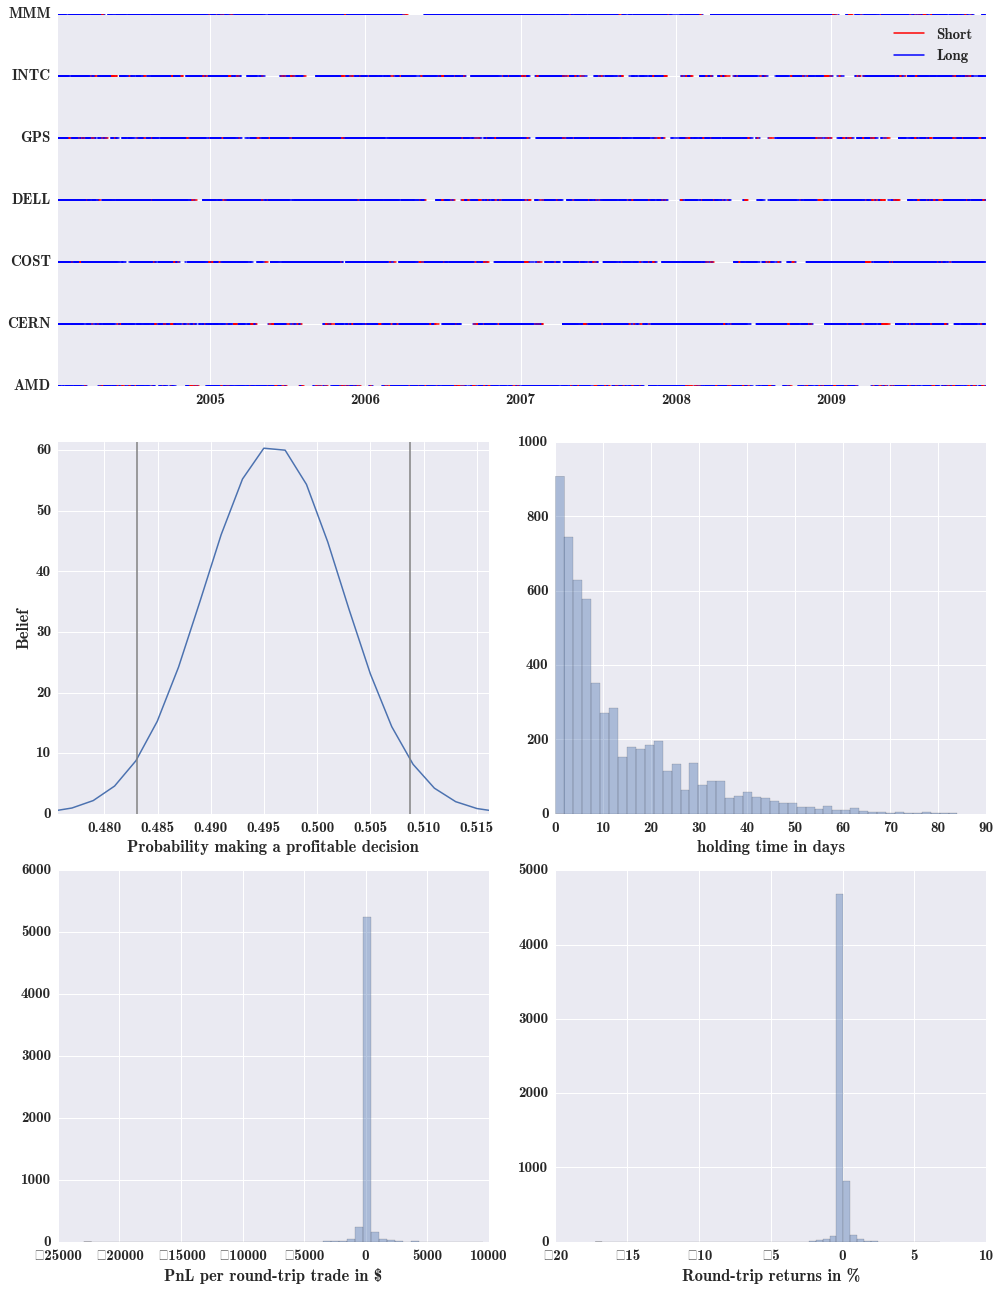

In [17]:
pf.create_round_trip_tear_sheet(returns, positions, transactions, sector_mappings=sect_map)